# Course Recommender

## Import Libraries

In [198]:
# data cleaning and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# text analysis
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

## Bring in Clean Data

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head(1)

,Unnamed: 0,name,instructor,level,category,subcategory,no_of_students,rating,no_of_rating,about,syllabus,language
0,0,Meditation: A way to achieve your goals in you...,Duck-Joo Lee,Beginner Level,Arts and Humanities,Philosophy,78489,4.6,843,Do we truly think that we have lived for ourse...,['Self- reflection is the methodology of medit...,English


In [4]:
str(df['syllabus'])

'0      [\'Self- reflection is the methodology of medit...\n1      [\'This course is about the remarkable northern...\n2      [\'Join us this week to find out how the course...\n3      [\'The goal of the Module is to define individu...\n4      [\'This module explores sourcing of materials f...\n                             ...                        \n906    [\'Approaching voting problems with the securit...\n907    [\'Welcome to our course! This is a hands-on wo...\n908    [\'Welcome to the first week of the course! Thı...\n909    [\'In this first week, you will learn more abou...\n910    ["This short module includes an overview of th...\nName: syllabus, Length: 911, dtype: object'

## Create the Corpus

I will combine all categorical columns except language.

In [5]:
df["corpus"] = df["name"].map(str) + " " + df["instructor"].map(str) +" "+ df["level"].map(str)+ " "+df['category'].map(str)+" "+df['subcategory'].map(str) +" "+ df['about'].map(str) + df['syllabus'].map(str) 
df["corpus"][0]


'Meditation: A way to achieve your goals in your life Duck-Joo Lee Beginner Level Arts and Humanities Philosophy Do we truly think that we have lived for ourselves? Perhaps we have lived for money, love, fame, family and pride etc.? Therefore, we don’t seem to be satisfied even though we are full of those things. It is because that we don’t know ourselves.Eric Fromm talked about human nature as two modes of being: “To Have” and “To Be”.  If we are “Having” the nature of possessions, we are not satisfied, and feel empty and futile. Then, how can we be “Being” the nature of our inner-selves?\n\nSometimes, we happened to be aware of this “Being” nature and try to change ourselves, but fail. But, because of our daily routines, it’s easily forgotten. And more it is hard to escape from our unwanted minds controlling us.\n\nFrom now on, let us reflect on ourselves and look at our minds leading up to today! Don’t we achieve our goals after knowing ourselves? And let us find the “Being” nature 

In [148]:
df.head()

,Unnamed: 0,name,instructor,level,category,subcategory,no_of_students,rating,no_of_rating,about,syllabus,language,corpus
0,0,Meditation: A way to achieve your goals in you...,Duck-Joo Lee,Beginner Level,Arts and Humanities,Philosophy,78489,4.6,843,Do we truly think that we have lived for ourse...,['Self- reflection is the methodology of medit...,English,Meditation: A way to achieve your goals in you...
1,1,Introduction to the Arctic: Climate,"Paul Myers, Ph.D",Mixed Level,Physical Science and Engineering,Environmental Science and Sustainability,13439,4.6,420,"The University of Alberta, the University of T...",['This course is about the remarkable northern...,English,Introduction to the Arctic: Climate Paul Myers...
2,2,Data Science in Stratified Healthcare and Prec...,Dr Areti Manataki,Intermediate Level,Data Science,Data Analysis,16421,4.6,241,An increasing volume of data is becoming avail...,['Join us this week to find out how the course...,English,Data Science in Stratified Healthcare and Prec...
3,3,How to Get Skilled: Introduction to Individual...,Dr. Valeri Chukhlomin,Intermediate Level,Personal Development,Personal Development,50038,3.7,214,Do you want to gain a competitive edge on the ...,['The goal of the Module is to define individu...,English,How to Get Skilled: Introduction to Individual...
4,4,Circular Economy - Sustainable Materials Manag...,Philip Peck,Beginner Level,Physical Science and Engineering,Environmental Science and Sustainability,37682,4.8,1136,This course looks at where important materials...,['This module explores sourcing of materials f...,English,Circular Economy - Sustainable Materials Manag...


In [10]:
df['corpus'] = df['corpus'].apply(clean_text)

6740

## Data Cleaning/Wrangling

- Explain cleaning and wrangling procedures

In [203]:
stop_words = set(stopwords.words('english'))
stop_words.update(['course','module','introduction','will','week','learn','video','part','lecture','video','using','system','one','new','use','first','s','work'])

wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text) 
    text = text.replace("nbsp", "")
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2) 

In [205]:
print(stop_words)
print(len(stop_words))

{'myself', 'against', 'the', 'some', 'am', 'out', 'first', 'because', 'you', 'here', "don't", 'themselves', "you're", 'lecture', 'very', 'does', 'these', 'can', 'off', 'week', 's', 'don', 'm', "she's", 'where', "it's", 'been', 'each', 'both', 'own', 'use', 'y', 'are', 'when', 'hasn', 'weren', 'be', 'learn', 'yourselves', 'is', 'should', 'hers', 'no', 'wasn', 'an', 'work', 'in', 'then', 're', "hadn't", 'more', 'into', 'will', 'part', 'has', 'o', 'couldn', 'such', 'mightn', 'which', 'had', 'over', 'my', "isn't", 'needn', 'once', 'by', 'who', 'our', 'do', 'during', 'again', 'for', 'so', "should've", 'himself', 't', "shan't", "didn't", 'ourselves', 'doing', 'same', 'with', 'after', 'at', 'why', 'having', 'their', 'how', 'd', "wasn't", 'and', 'but', 'it', "mightn't", "hasn't", 'not', "aren't", 'yours', 'introduction', 'few', 'further', "couldn't", 'ma', "wouldn't", 'most', "haven't", 'this', 'below', 'on', 'mustn', 'video', 'haven', 'yourself', 'didn', 'its', "that'll", 'a', 'to', "weren't"

In [151]:
df['corpus'] = df['corpus'].apply(lambda x: clean_txt(x))

In [152]:
df['corpus'][0]

'meditation way achieve goals life duck joo lee beginner level arts humanities philosophy truly think live perhaps live money love fame family pride etc therefore seem satisfy even though full things know eric fromm talk human nature two modes nature possessions satisfy feel empty futile nature inner selves sometimes happen aware nature try change fail daily routines easily forget hard escape unwanted mind control let reflect look mind lead today achieve goals know let find nature original selves escape mind restrain control lecture definition principle mind explain simple clear ways make sure practice methodology find true original mind inner self escape false mind possession self reflection first step meditate know objectively meditation realize thoughts action due mind nonexistent false throw away false mind find true mind meditation world wide sensation many research report show people leaders habit self reflection meditation meditation school workplace popular happiness worry real

## Using TFIDF

In [15]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [63]:
def get_cos_similarity_scores(user_input,vectorizer,vectorized_corpus):
    tokens = [str(tok) for tok in word_tokenize(user_input)]
    user_tfidf = vectorizer.transform(tokens)
    cos_similarity = map(lambda x: cosine_similarity(user_tfidf, x),vectorized_corpus)
    output = list(cos_similarity)
    return output

In [80]:
def get_user_vectorized(user_input,vectorizer,vectorized_corpus):
    tokens = [str(tok) for tok in word_tokenize(user_input)]
    user_tfidf = vectorizer.transform(tokens)
    return user_tfidf

In [153]:
TFIDF = tfidf_vectorizer.fit_transform((df['corpus']))

def get_recommendation_TFIDF(user_input,df):
    output = get_cos_similarity_scores(user_input,vectorizer = tfidf_vectorizer,vectorized_corpus =  TFIDF)
    top = sorted(range(len(output)), key=lambda i: output[i][0], reverse=True)[:5]
    list_scores = [output[i][0][0] for i in top]
    
    recommendation = pd.DataFrame(columns = ['name',  'instructor','rating', 'score','index'])
    count = 0
    best_index = list()
    for i in top:
        recommendation.at[count, 'name'] = df['name'][i]
        recommendation.at[count, 'instructor'] = df['instructor'][i]
        recommendation.at[count, 'rating'] = df['rating'][i]
        recommendation.at[count, 'score'] =  list_scores[count]
        index = list(df. index)
        recommendation['index'][count] = i
        count += 1
        best_index.append(i) 
    return recommendation, best_index

In [206]:
get_recommendation_TFIDF('sql',df)[0]

,name,instructor,rating,score,index
0,Data-driven Astronomy,Tara Murphy,4.8,0.267054,853
1,Geographical Information Systems - Part 1,Stéphane Joost,3.6,0.238081,858
2,Quantum Optics 2 - Two photons and more,Alain AspectTop Instructor,4.9,0.098325,651
3,Web Development with Java Spring Framework,Martyshkin Alexey Ivanovich,3.7,0.028887,580
4,Introduction to TCP/IP,Jong-Moon Chung,4.6,0.020284,477


## Using CountVectorizer

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [267]:
CV = count_vectorizer.fit_transform((df['corpus']))

def get_recommendation_CV(user_input,df):
    output = get_cos_similarity_scores(user_input,vectorizer = count_vectorizer, vectorized_corpus= CV)
    top = sorted(range(len(output)), key=lambda i: output[i][0], reverse=True)[:5]
    list_scores = [output[i][0][0] for i in top]
    
    recommendation = pd.DataFrame(columns = ['name',  'instructor','rating', 'score','index'])
    count = 0
    best_index = list()
    for i in top:
        recommendation.at[count, 'name'] = df['name'][i]
        recommendation.at[count, 'instructor'] = df['instructor'][i]
        recommendation.at[count, 'rating'] = df['rating'][i]
        recommendation.at[count, 'score'] =  list_scores[count]
        index = list(df. index)
        recommendation['index'][count] = i
        count += 1
        best_index.append(i) 
    return recommendation, best_index

In [207]:
get_recommendation_CV('sql',df)[0]

,name,instructor,rating,score,index
0,Data-driven Astronomy,Tara Murphy,4.8,0.086499,853
1,Geographical Information Systems - Part 1,Stéphane Joost,3.6,0.076005,858
2,Quantum Optics 2 - Two photons and more,Alain AspectTop Instructor,4.9,0.041341,651
3,Web Development with Java Spring Framework,Martyshkin Alexey Ivanovich,3.7,0.012883,580
4,Introduction to TCP/IP,Jong-Moon Chung,4.6,0.008957,477


## Using KNN

In [86]:
from sklearn.neighbors import NearestNeighbors

def get_NNS(user_input,n_neighbors,vectorizer, vectorized_corpus):   # vectorized_corpus could be TFIDF or CV
    KNN = NearestNeighbors(n_neighbors, p=2)
    KNN.fit(vectorized_corpus)
    user_tfidf = get_user_vectorized(user_input,vectorizer,vectorized_corpus)
    NNs = KNN.kneighbors(user_tfidf, return_distance=True) 
    return NNs

In [103]:
def get_recommendation_KNN(user_input,df):
    top = get_NNS(user_input,6,vectorizer=tfidf_vectorizer, vectorized_corpus=TFIDF)[1][0][1:]
    index_score = get_NNS(user_input,6,vectorizer=tfidf_vectorizer, vectorized_corpus=TFIDF)[0][0][1:]
    recommendation = pd.DataFrame(columns = ['name',  'instructor','rating', 'score','index'])
    count = 0
    best_index = list()
    for i in top:
        recommendation.at[count, 'name'] = df['name'][i]
        recommendation.at[count, 'instructor'] = df['instructor'][i]
        recommendation.at[count, 'rating'] = df['rating'][i]
        recommendation.at[count, 'score'] =  index_score[count]
        index = list(df. index)
        recommendation['index'][count] = i
        count += 1
        best_index.append(i) 
    return recommendation, best_index
    


In [209]:
get_recommendation_KNN('tableau',df)[0]

/Users/ummuhandemir/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,name,instructor,rating,score,index
0,Discrete Optimization,Professor Pascal Van Hentenryck,4.8,1.370726,884
1,"Networks: Friends, Money, and Bytes",Mung Chiang,4.7,1.414214,663
2,Introduction to Neuroeconomics: How the Brain ...,Vasily Klucharev,4.6,1.414214,274
3,Arts and Heritage Management,Andrea Rurale,4.7,1.414214,832
4,Richard Schechner's Introduction to Performanc...,Richard Schechner,4.8,1.414214,504


In [257]:
def locate_corpus_by_name(user_input,df):
    new = df.loc[df.name == user_input, 'corpus']
    return new

In [237]:
locate_course_name('Networks: Friends, Money, and Bytes')

663    network friends money bytes mung chiang mix le...
Name: corpus, dtype: object

In [273]:
def recommender():
    response = input( "\033[1m" + """
                        Welcome to the Coursera course recommender! (It contains only free courses.)
                        Are you new here?(yes/no): """).lower().replace(" ", '')
    while response == 'yes':
        query_sentence = input("\033[1m" + """
                        I am glad you prefer studying today!
                        What do you want to learn? Give me some keywords that are important for you: 
                        """).lower()
            
        best_index = get_recommendation_CV(query_sentence,df)[1]
        #print(best_index)
        if len(best_index)==0:
            response = input("\033[1m" + """
                        Sorry, couldnt find a good match. Do you want to try again? (yes/no)
                        """)
            if response == 'yes':
                print("\033[1m"+ """
                        This time please give more details.
                        """)
            if response == 'no':
                print("\033[1m"+ """
                        Please don't quit on studying. See you later!
                        """)
            
        elif len(best_index)!=0:
            print("\033[1m"+"""
                        We have three courses for you, choose according to your level: """)
            
            for i in list(best_index):
                course_name = df['name'].iloc[i]
                instructor = df['instructor'].iloc[i]
                level = df['level'].iloc[i]
                print("\033[1m"+ """ 
                            {}: 
                            {} 
                            by {} """.format(level,"\u0332".join(course_name),instructor))
                    
            response = 'no'
            return 
        
    
            
    while response == 'no':
        query_sentence = str(input("\033[1m" + """
                            How nice you are back! Which course have you completed?(Full course name please)
                                """).lower())
    
        query = str(locate_corpus_by_name(query_sentence,df))
        best_index = get_recommendation_CV(query,df)[1]
    
        print(best_index)
        if len(best_index)==0:
            response = input("\033[1m" + """
                        Sorry, couldnt find a good match. Do you want to try again? (yes/no)
                        """)
            if response == 'yes':
                print("\033[1m"+ """
                        This time please give more details.
                        """)
            if response == 'no':
                print("\033[1m"+ """
                            Please don't quit on studying. See you later!
                        """)
            
        elif len(best_index)!=0:
            print("\033[1m"+"""
                        We have three courses for you, choose according to your level: """)
            
            for i in list(best_index):
                course_name = df['name'].iloc[i]
                instructor = df['instructor'].iloc[i]
                level = df['level'].iloc[i]
                print("\033[1m"+ """ 
                            {}: 
                            {} 
                            by {} """.format(level,"\u0332".join(course_name),instructor))
                    
            response = 'yes'
            return
        

In [274]:
recommender()


                        Welcome to the Coursera course recommender! (It contains only free courses.)
                        Are you new here?(yes/no): no

                            How nice you are back! Which course have you completed?(Full course name please)
                                machine learning
[77, 766, 693, 541, 706]

                        We have three courses for you, choose according to your level: 
 
                            Mixed Level: 
                            S̲i̲n̲g̲l̲e̲ ̲V̲a̲r̲i̲a̲b̲l̲e̲ ̲C̲a̲l̲c̲u̲l̲u̲s 
                            by Robert Ghrist 
 
                            Mixed Level: 
                            C̲a̲l̲c̲u̲l̲u̲s̲:̲ ̲S̲i̲n̲g̲l̲e̲ ̲V̲a̲r̲i̲a̲b̲l̲e̲ ̲P̲a̲r̲t̲ ̲1̲ ̲-̲ ̲F̲u̲n̲c̲t̲i̲o̲n̲s 
                            by Robert Ghrist 
 
                            Mixed Level: 
                            S̲c̲r̲i̲p̲t̲ ̲W̲r̲i̲t̲i̲n̲g̲:̲ ̲W̲r̲i̲t̲e̲ ̲a̲ ̲P̲i̲l̲o̲t̲ ̲E̲p̲i̲s̲o̲d̲e̲ ̲f̲o̲r̲ ̲a̲ ̲T̲V̲ ̲o̲r̲ ̲W̲e̲b̲ ̲S̲e̲r̲i̲e̲s̲ ̲(̲P

In [113]:

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [175]:
bunch_text = " ".join(text for text in df['corpus'][110].split(' '))

In [177]:
stopwords = set(list(STOPWORDS))
stopwords.update(['course','module','introduction','will','week','learn','video','part','lecture','video','using','system','one','new','use','first','s','work'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap= "magma").generate(bunch_text)

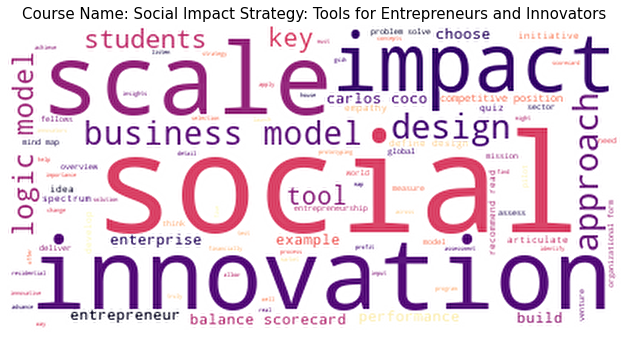

In [196]:
plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="sinc")
plt.axis("off")
title = df['name'].iloc[110]
plt.title('Course Name: ' + title, fontsize=15)

plt.show()


In [194]:
def get_wordcloud(text):
    bunch_text = " ".join(text for text in text.split(' '))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap= "magma").generate(bunch_text)
    plt.figure(figsize=[11,11])
    plt.imshow(wordcloud, interpolation="sinc")
    plt.axis("off")
    title = df['name'].iloc[110]
    plt.title('Course Name: ' + title, fontsize=15)

    plt.show()
    return

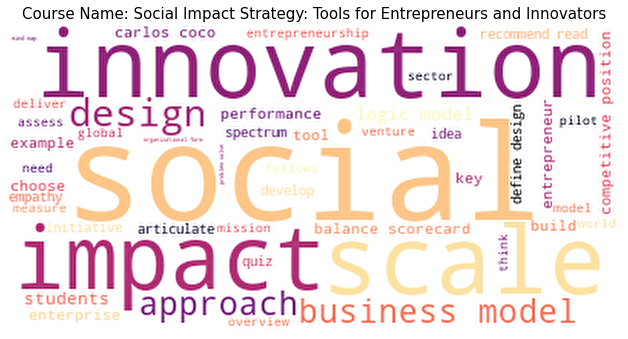

In [197]:
get_wordcloud(df['corpus'][110])